Given the following values of X and Y
(1,1), (2,2), (4,4), (100,100), (20, 20)
what is the value of Y when X = 5??
The answer is : 5.
Regression is Predicting a continuous-valued attribute(Attribute which is measurable like height, weight, time) associated with an object  𝑦=𝑚𝑥+𝑐

In [105]:
# Installing Packages
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip install scikit-learn
!pip install seaborn

In [210]:
# Importing Module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression, Lasso, Ridge
import scipy.stats

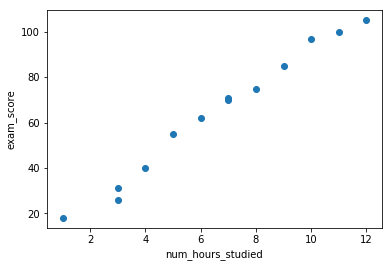

In [167]:
num_hours_studied = np.array([1, 3, 3, 4, 5, 6, 7, 7, 8, 9, 10, 11, 12])
exam_score = np.array([18, 26, 31, 40, 55, 62, 71, 70, 75, 85, 97, 100, 105])
plt.scatter(num_hours_studied, exam_score)
plt.xlabel('num_hours_studied')
plt.ylabel('exam_score')
plt.show()

We can clearly see that there is a linear relationship. So in order to predict the exam_score for  exams, given value of num hours studies, we need a linear model which can take input as num_hours_studies and return us the exam_score
But How??
We have

y=mx+c
 
Here for known data, we already have x values and y values. we just need to approximate m and c. Then we will have a straight line In machine learning, we represent it as

𝑦=𝑊𝑥+𝑏
where W is the weight vector(how much importance is assigned to a feature) and b is the bias or the intercept.

We want to have a value of m and c which best fits our data. So there should be a proper mechanism so find out.


# Loss Function
Here we have 2 parameters W and b and in order to approximate y and changing the values of m and c will give us different lines. So we have to find the optimal line i.e optimal value of m and c

We need a mechanism which can tell us how much loss we are incurring on selecting parameter values. This is achieved using a loss function.

Therefore, we use mean squared error for this

$$\text{MSE} = \frac{1}{n} \sum_{i=1}^n (y^{(i)} - h_\theta^{(i)})^2$$


The solution to above equation is
$$\mathbf{W}^* = (\mathbf{X}^\top\mathbf{X})^{-1}\mathbf{X}^\top \mathbf{y}$$

### Normalization

It is a good idea to normalize all the values in the design matrix. This means all values should be in the range $(0, 1)$ and centered around zero.

![normalization](http://cs231n.github.io/assets/nn2/prepro1.jpeg)

(Image taken from http://cs231n.github.io/neural-networks-2/)

Normalization helps the learning algorithm perform better.
Fortunately, `sklearn.linear_model.LinearRegression` has an initialization parameter `normalize` that will take care of this for you.

In [168]:
# Data split

num_hours_studied = np.array([1, 2, 3, 4, 5, 6, 7, 7, 8, 9, 10, 11, 12])
exam_score = np.array([18, 26, 31, 40, 55, 62, 71, 70, 75, 85, 97, 101, 105])

x_train = np.array([[1], [2], [3], [4], [5], [6], [7], [7], [8], [10], [12]])
y_train = np.array([18, 26, 31, 40, 55, 62, 71, 70, 75, 97, 105])

x_test = [[9], [11]]
y_test = [85, 100]

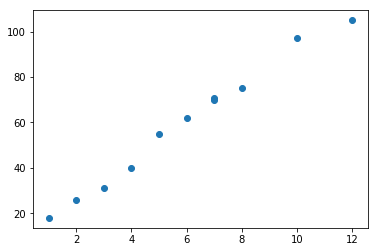

In [169]:
plt.scatter(x_train, y_train)

In [170]:
model = LinearRegression(normalize=True)
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [171]:
print('Model Coeff:  ' + '{}'.format(model.coef_))
print('Model Bias: ' + '{}'.format(model.intercept_))

Model Coeff:  [8.37922705]
Model Bias: 9.577294685990339


So from above coefficient and intercept our equation will be like:
y=8.37 x + 9.57
So from above equation/model you can predict any of given value of x

But we are not going to calculate this equation the function will predict

In [172]:
def plot_curve(x, coef, bias):
    y = x * coef + bias
    plt.plot(x, y, color='g')

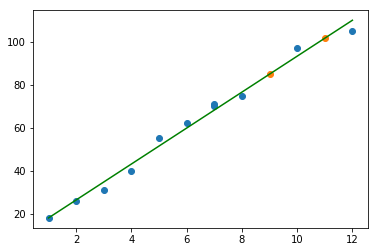

In [173]:
y_pred = model.predict(x_test)
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_pred)
plot_curve(num_hours_studied, model.coef_, model.intercept_)

In [174]:
# model evaluation
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# printing values
print('Root mean squared error: ', rmse)
print('R2 score or coeficient of determination: ', r2)

Root mean squared error:  1.5291838782702214
R2 score or coeficient of determination:  0.9728145088307516


In [175]:
#Alternate way of calculation
# sum of square of residuals
ssr = np.sum((y_pred - y_test)**2)
print(ssr)

#  total sum of squares
sst = np.sum((y_test - np.mean(y_test))**2)
print(sst)

# R2 score
r2_score = 1 - (ssr/sst)
print(r2_score)

3.058367756540443
112.5
0.9728145088307516


# Predicting Car Sales Price

Multiple Linear Regression:
Multiple linear regression is the most common form of linear regression analysis.
Multiple linear regression is used to explain the relationship between one continuous dependent variable  from two or more independent variables.
The independent variables can be continuous or categorical (dummy coded as appropriate)
Independent variables should not be multi-collinear

In [216]:
df = pd.read_csv('C:/Z-KailashShyam/Study/Aegis/Machine Learning Foundation/car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


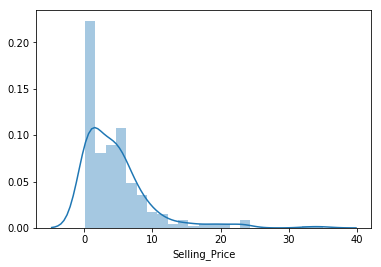

In [217]:
sns.distplot(df.Selling_Price)

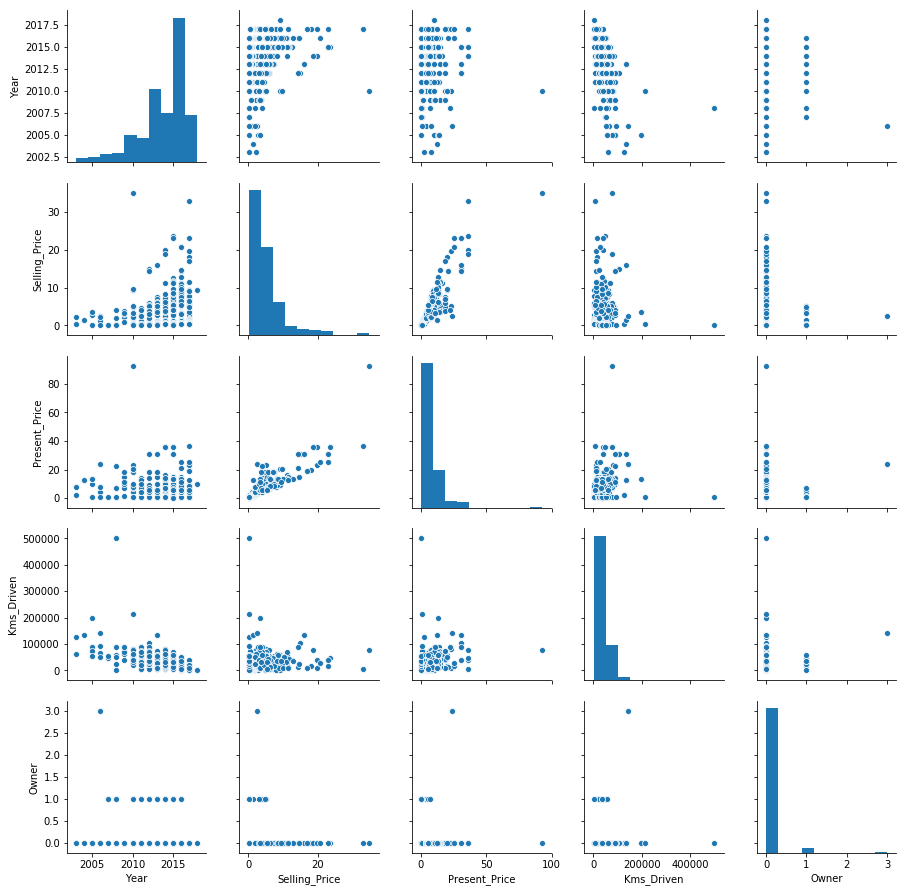

In [218]:
sns.pairplot(df)

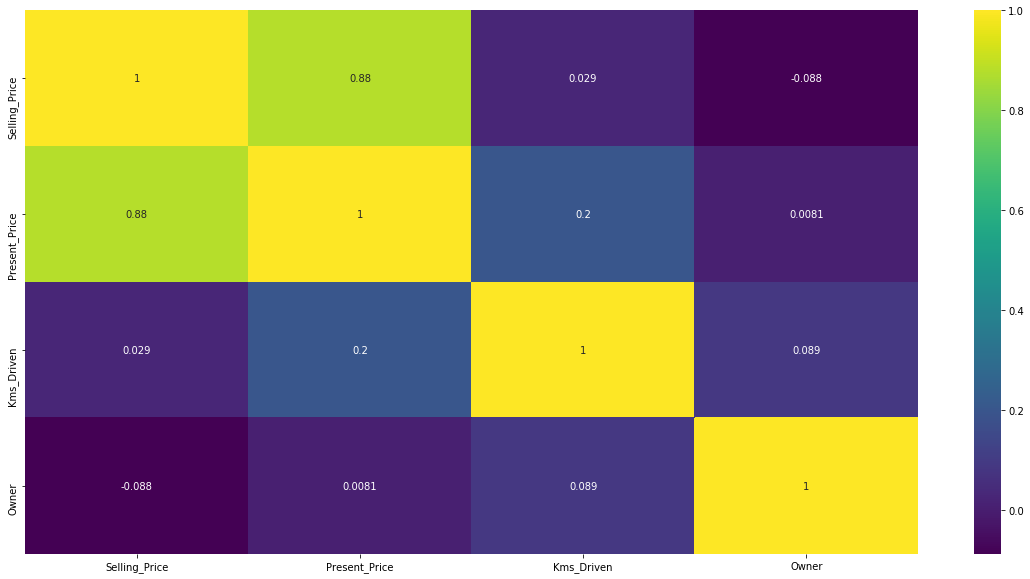

In [179]:
#Colinearity check using correlation
fig, ax = plt.subplots(figsize=(20,10)) 
sns.heatmap(df.drop('Year', axis = 1).corr(), annot=True, cmap = 'viridis')

#Otherways 
#df.corr(method ='pearson')


In [219]:
y = df['Selling_Price'].values
df = pd.get_dummies(df[['Kms_Driven', 'Present_Price', 'Fuel_Type']])

In [220]:
df.head()

,Kms_Driven,Present_Price,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,27000,5.59,0,0,1
1,43000,9.54,0,1,0
2,6900,9.85,0,0,1
3,5200,4.15,0,0,1
4,42450,6.87,0,1,0


In [221]:
x = df[['Kms_Driven', 'Present_Price', 'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol']].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 42)

In [222]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [223]:
coeff_df = pd.DataFrame(model.coef_,df.columns,columns=['Coefficient'])
ranked_features = coeff_df.sort_values("Coefficient", ascending = False)
ranked_features

,Coefficient
Fuel_Type_Diesel,1.881890
Present_Price,0.473207
Kms_Driven,-0.000022
Fuel_Type_Petrol,-0.755999
Fuel_Type_CNG,-1.125891


In [224]:
y1_pred = model.predict(x_test)
print(y1_pred)

[ 1.11743534  7.57043734  7.13989657  0.87487008  9.30125331  7.3015891
  1.49921926  1.61695183  1.32375298  7.73093146  8.62079056  1.34485955
  6.74358716  1.58960937  7.47066737  2.26790466  1.95146245 10.00568
  1.44283047  2.20730598  1.45776517  8.03443313  7.75023485  3.29721777
  1.29413107  3.81822036  4.81135835  3.13074523  1.82999006  1.68982658
  1.39653245]


In [225]:
# model evaluation
rmse = mean_squared_error(y_test, y1_pred)
r2 = r2_score(y_test, y1_pred)
# printing values
print('Root mean squared error: ', rmse)
print('R2 score or coeficient of determination: ', r2)

Root mean squared error:  2.822285838525519
R2 score or coeficient of determination:  0.8107668063310705


#Regularization
Sometimes, a feature may get too high importance. Therefore, in order to make the model more robust to unseen data, we need to avoid weights taking too high values. This technique is known as reqularization

L1 regularization: Adding sum of weight values scaled by a constant. Also known as Lasso
L2 regularization: Adding sum of square of weight values scaled by a constant. Also known as Ridge

In [147]:
#Lasso
lasso = Lasso()
lasso.fit(x_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [148]:
coeff_df = pd.DataFrame(lasso.coef_,df.columns,columns=['Coefficient'])
ranked_features = coeff_df.sort_values("Coefficient", ascending = False)
ranked_features

,Coefficient
Present_Price,0.515811
Fuel_Type_CNG,-0.000000
Fuel_Type_Diesel,0.000000
Fuel_Type_Petrol,-0.000000
Kms_Driven,-0.000019


In [157]:
lassoReg = Lasso(normalize=True)
lassoReg.fit(x_train,y_train)
y_pred = lassoReg.predict(x_test)

In [158]:
# model evaluation
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# printing values
print('Root mean squared error: ', rmse)
print('R2 score or coeficient of determination: ', r2)

Root mean squared error:  15.866919900482323
R2 score or coeficient of determination:  -0.06387095363310902


In [162]:
#Ridge
ridgeReg = Ridge()
ridgeReg.fit(x_train,y_train)
y_pred = ridgeReg.predict(x_test)

In [164]:
coeff_df = pd.DataFrame(ridgeReg.coef_,df.columns,columns=['Coefficient'])
ranked_features = coeff_df.sort_values("Coefficient", ascending = False)
ranked_features

,Coefficient
Fuel_Type_Diesel,1.712064
Present_Price,0.474275
Kms_Driven,-0.000022
Fuel_Type_CNG,-0.834813
Fuel_Type_Petrol,-0.877251


In [165]:
# model evaluation
rmse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, y_pred)
# printing values
print('Root mean squared error: ', rmse)
print('R2 score or coeficient of determination: ', r2)

Root mean squared error:  3.1652614134494517
R2 score or coeficient of determination:  0.8124486316054129
